## Workspace setup

In [11]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from termcolor import colored
import scipy
import matplotlib.pyplot as plt
from matplotlib import colors

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

### Data loading

In [12]:
path = '/scratch_cmsse/alibordi/data/*parquet*iPt*Feb22*'
path = "/home/kbunkow/cms_data/SingleMu/TFRecord/*parquet*iPt*Feb22*"
path = "/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_OneOverPt_Feb*_chunk_0.gzip"
fileNames = glob.glob(path)

path = "/home/kbunkow/cms_data/SingleMu/TFRecord/*parquet*iPt0*Feb*"
fileNames = fileNames + glob.glob(path)

path = "/home/kbunkow/cms_data/SingleMu/TFRecord/*parquet*iPt2*Feb*"
fileNames = fileNames + glob.glob(path)

print(colored("Input files:","blue"),fileNames)

df = pd.read_parquet(fileNames[0])

df_fragments = [pd.read_parquet(fileName) for fileName in fileNames]
df = pd.concat(df_fragments)

df = df[df['muonPt']>0]

df.describe()

Inpus files: ['/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_OneOverPt_Feb15_chunk_0.gzip', '/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_OneOverPt_Feb22_chunk_0.gzip', '/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_iPt0_Feb22_chunk_0.gzip', '/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_iPt0_Feb15_chunk_0.gzip', '/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_iPt2_Feb15_chunk_0.gzip', '/home/kbunkow/cms_data/SingleMu/TFRecord/df.parquet_SingleMu_iPt2_Feb22_chunk_0.gzip']


,eventNum,muonEvent,muonPt,muonEta,muonPhi,muonCharge,muonDxy,muonRho,omtfPt,omtfEta,...,phiDist_8,phiDist_9,phiDist_10,phiDist_11,phiDist_12,phiDist_13,phiDist_14,phiDist_15,phiDist_16,phiDist_17
count,1.911044e+06,1911044.0,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1911044.0,1911044.0,1.911044e+06,1.911044e+06,...,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06,1.911044e+06
mean,4.615375e+05,0.0,1.995969e+02,-1.253115e-03,6.299604e-04,-1.196728e-02,0.0,0.0,6.399516e+01,1.670650e-04,...,7.345382e+03,8.845832e+03,5.307281e+03,5.833266e+03,6.009834e+03,7.431380e+03,8.106470e+03,6.851896e+03,6.552891e+03,8.066772e+03
std,2.728539e+05,0.0,2.948716e+02,9.991537e-01,1.814311e+00,9.999287e-01,0.0,0.0,8.018693e+01,9.745896e-01,...,4.414930e+03,3.193839e+03,4.989714e+03,4.929578e+03,4.896360e+03,4.368301e+03,3.916904e+03,4.643956e+03,4.752077e+03,3.947966e+03
min,1.000000e+00,0.0,2.392205e-02,-3.831793e+00,-3.141590e+00,-1.000000e+00,0.0,0.0,0.000000e+00,-1.250625e+00,...,-1.580000e+02,-2.720000e+02,-4.210000e+02,-4.770000e+02,-4.810000e+02,-4.970000e+02,-3.480000e+02,-3.280000e+02,-2.760000e+02,-2.560000e+02
25%,2.293028e+05,0.0,7.067295e+00,-9.833127e-01,-1.571906e+00,-1.000000e+00,0.0,0.0,6.000000e+00,-9.787500e-01,...,1.900000e+01,9.999000e+03,1.000000e+00,1.000000e+00,2.000000e+00,4.200000e+01,9.999000e+03,1.200000e+01,3.000000e+00,9.999000e+03
50%,4.546180e+05,0.0,2.100366e+01,-5.909699e-01,-2.422020e-03,-1.000000e+00,0.0,0.0,1.200000e+01,0.000000e+00,...,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
75%,6.861902e+05,0.0,3.404815e+02,9.825851e-01,1.573567e+00,1.000000e+00,0.0,0.0,1.140000e+02,9.787500e-01,...,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
max,9.999990e+05,0.0,9.999968e+02,2.282860e+00,3.141592e+00,1.000000e+00,0.0,0.0,2.000000e+02,1.250625e+00,...,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


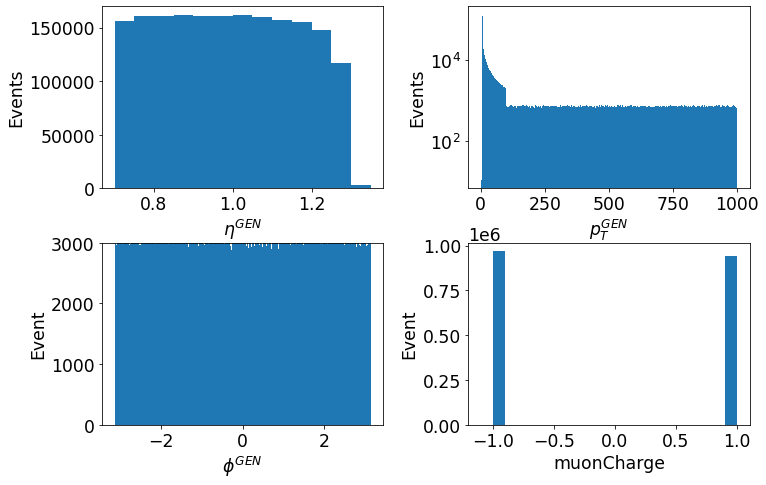

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (10, 7))

bins = np.arange(0.7, 1.4, 0.05)
axes[0,0].hist(np.abs(df["muonEta"]), bins=bins);
axes[0,0].set_xlabel(r'$\eta^{GEN}$')
axes[0,0].set_ylabel('Events')

bins = np.arange(0, 1000, 1)
axes[0,1].hist(df["muonPt"], bins=bins);
axes[0,1].set_xlabel(r'$p_{T}^{GEN}$')
axes[0,1].set_ylabel('Events')
axes[0,1].set_yscale("log")
#axes[0].set_xlim([0,1])
#axes[0].set_ylim([0,1])
        
bins = np.arange(-np.pi, np.pi, 0.01)
axes[1,0].hist(df["muonPhi"], bins=bins);
axes[1,0].set_xlabel(r'$\phi^{GEN}$')
axes[1,0].set_ylabel('Event')
#axes[0].set_xlim([0,1])
axes[1,0].set_ylim([0,3E3])

bins = np.arange(-1.1, 1.1, 0.1)
axes[1,1].hist(df["muonCharge"], bins=bins);
axes[1,1].set_xlabel(r'muonCharge')
axes[1,1].set_ylabel('Event')
#axes[0].set_xlim([0,1])
#axes[0,1].set_ylim([0,3E3])

plt.subplots_adjust(bottom=0.05, left=0.05, right=0.95, wspace=0.3, hspace=0.3)

### OMTF efficiency for the original sample

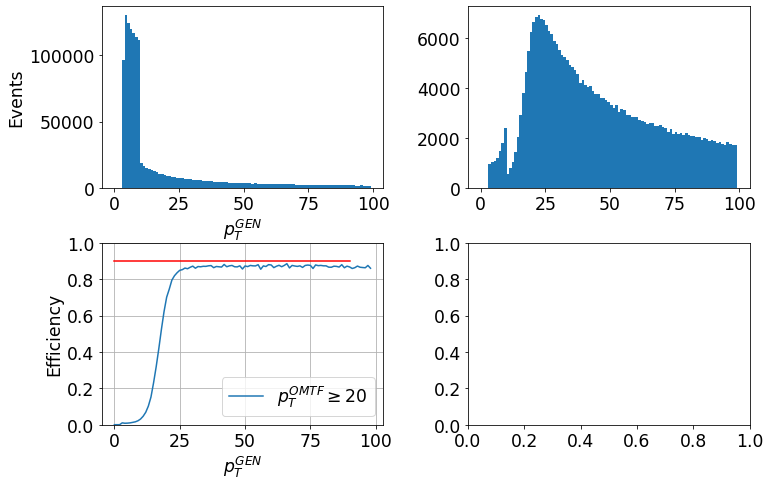

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (10, 7))

bins = np.arange(0, 100, 1)
h_denom, _, _ = axes[0,0].hist(df["muonPt"], bins=bins);
axes[0,0].set_xlabel(r'$p_{T}^{GEN}$')
axes[0,0].set_ylabel('Events')

df_omtf = df[df["omtfPt"]>=20]
h_num, _, _ = axes[0,1].hist(df_omtf["muonPt"], bins=bins);


eff = h_num/h_denom

x = bins[:-1]
axes[1,0].plot(x, eff, label=r'$p_{T}^{OMTF} \geq 20$')
axes[1,0].plot([0,90], [0.9,0.9], "r")
axes[1,0].set_xlabel(r'$p_{T}^{GEN}$')
axes[1,0].set_ylabel('Efficiency')
axes[1,0].set_ylim([0,1])
axes[1,0].grid(visible=True, which='both')
axes[1,0].legend()

plt.subplots_adjust(bottom=0.05, left=0.05, right=0.95, wspace=0.3, hspace=0.3)

### OMTF efficiency for sample restricted to OMTF acceptance region

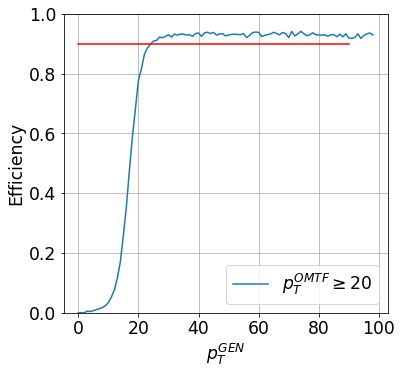

In [15]:
df_filtered = df[np.abs(df['muonEta'])<1.24]
df_filtered = df[np.abs(df['muonEta'])>0.83]              

fig, axes = plt.subplots(1, 1, figsize = (5, 5))

bins = np.arange(0, 100, 1)
h_denom, _, _ = axes.hist(df_filtered["muonPt"], bins=bins);

df_omtf = df_filtered[df_filtered["omtfPt"]>=20]
h_num, _, _ = axes.hist(df_omtf["muonPt"], bins=bins);

axes.clear()

eff = h_num/h_denom
x = bins[:-1]
axes.plot(x, eff, label=r'$p_{T}^{OMTF} \geq 20$')
axes.plot([0,90], [0.9,0.9], "r")
axes.set_xlabel(r'$p_{T}^{GEN}$')
axes.set_ylabel('Efficiency')
axes.set_ylim([0,1])
axes.legend()
axes.grid(visible=True, which='both')

plt.subplots_adjust(bottom=0.05, left=0.05, right=0.95, wspace=0.3, hspace=0.3)